In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2020-12-21T17:00:00,15,Campania,1571,120,1691,81841,83532,-434,691,...,28.0,9662.0,7692.0,-452.0,7.10,2.02,7.15,8.98,0.84,-0.52
301,2020-12-22T17:00:00,15,Campania,1529,118,1647,79612,81259,-2273,791,...,25.0,10185.0,979.0,-2229.0,7.16,2.03,7.77,80.80,-1.67,-2.72
302,2020-12-23T17:00:00,15,Campania,1513,107,1620,78327,79947,-1312,1067,...,19.0,18426.0,4672.0,-1285.0,6.60,2.03,5.79,22.84,-9.32,-1.61
303,2020-12-24T17:00:00,15,Campania,1488,102,1590,78419,80009,62,1156,...,20.0,20404.0,13612.0,92.0,6.42,1.99,5.67,8.49,-4.67,0.08


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1009
Nuovi tamponi: 16355.0
Percentuale nuovi positivi/nuovi tamponi: 6.2 %
Nuovi guariti: 464.0
Nuovi deceduti: 7.0
Variazione positivi ricoverati con sintomi: -39.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 577.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-26T17:00:00,15,Campania,1191,123,1314,29361,30675,1955,1981,...,16.0,11569.0,7436.0,1905.0,9.36,4.28,17.12,26.64,8.85,6.81
1,2020-10-27T17:00:00,15,Campania,1210,140,1350,31491,32841,2166,2761,...,20.0,14781.0,8541.0,2130.0,10.37,4.11,18.68,32.33,13.82,7.06
2,2020-10-28T17:00:00,15,Campania,1235,160,1395,33491,34886,2045,2427,...,17.0,15030.0,8965.0,2000.0,11.47,4.00,16.15,27.07,14.29,6.23
3,2020-10-29T17:00:00,15,Campania,1297,164,1461,36243,37704,2818,3103,...,20.0,17735.0,10463.0,2752.0,11.23,3.87,17.50,29.66,2.50,8.08
4,2020-10-30T17:00:00,15,Campania,1385,161,1546,38804,40350,2646,3186,...,15.0,18656.0,12453.0,2561.0,10.41,3.83,17.08,25.58,-1.83,7.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-21T17:00:00,15,Campania,1571,120,1691,81841,83532,-434,691,...,28.0,9662.0,7692.0,-452.0,7.10,2.02,7.15,8.98,0.84,-0.52
57,2020-12-22T17:00:00,15,Campania,1529,118,1647,79612,81259,-2273,791,...,25.0,10185.0,979.0,-2229.0,7.16,2.03,7.77,80.80,-1.67,-2.72
58,2020-12-23T17:00:00,15,Campania,1513,107,1620,78327,79947,-1312,1067,...,19.0,18426.0,4672.0,-1285.0,6.60,2.03,5.79,22.84,-9.32,-1.61
59,2020-12-24T17:00:00,15,Campania,1488,102,1590,78419,80009,62,1156,...,20.0,20404.0,13612.0,92.0,6.42,1.99,5.67,8.49,-4.67,0.08


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

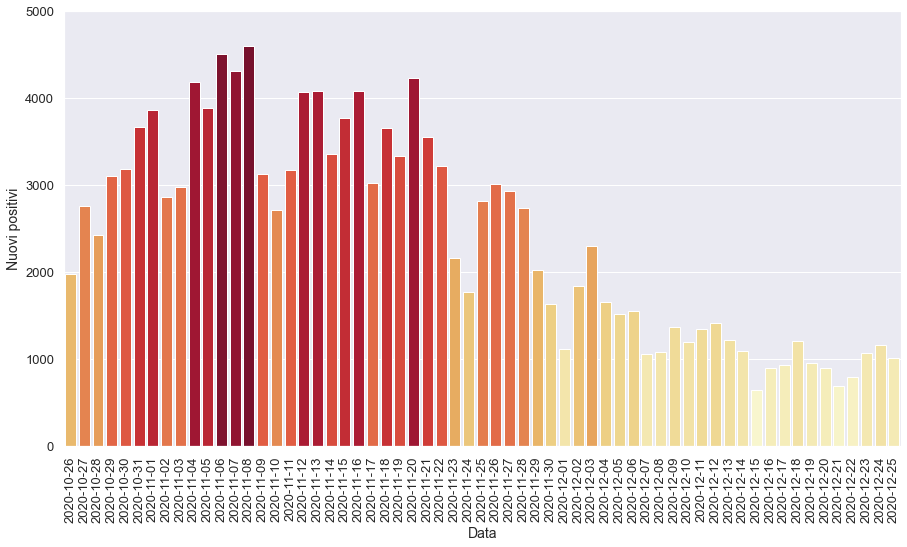

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

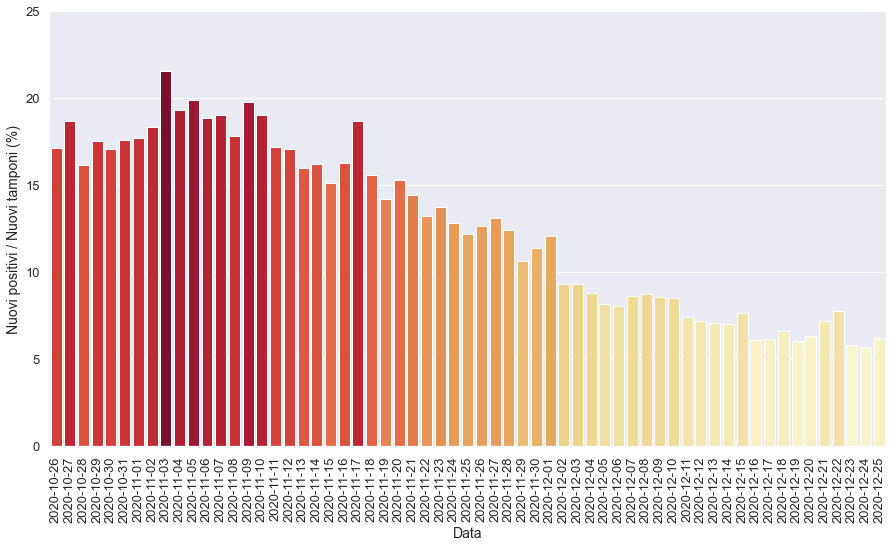

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

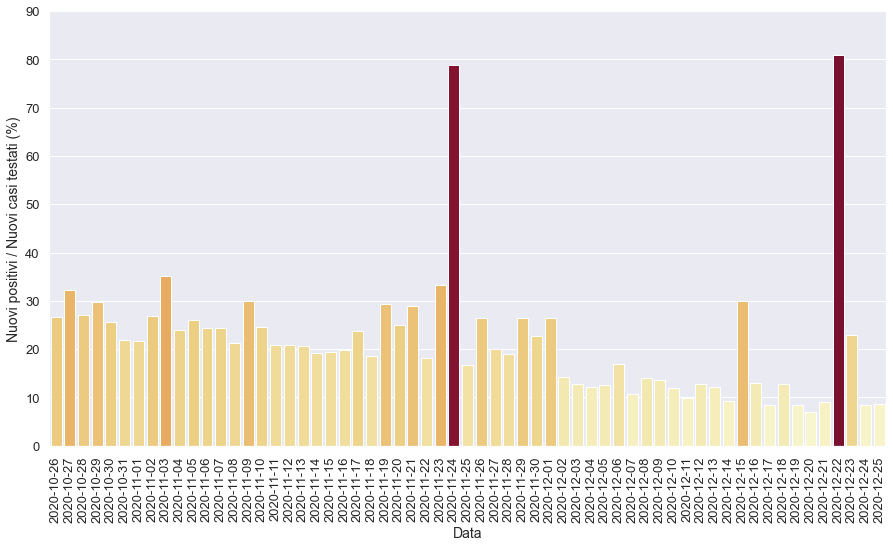

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

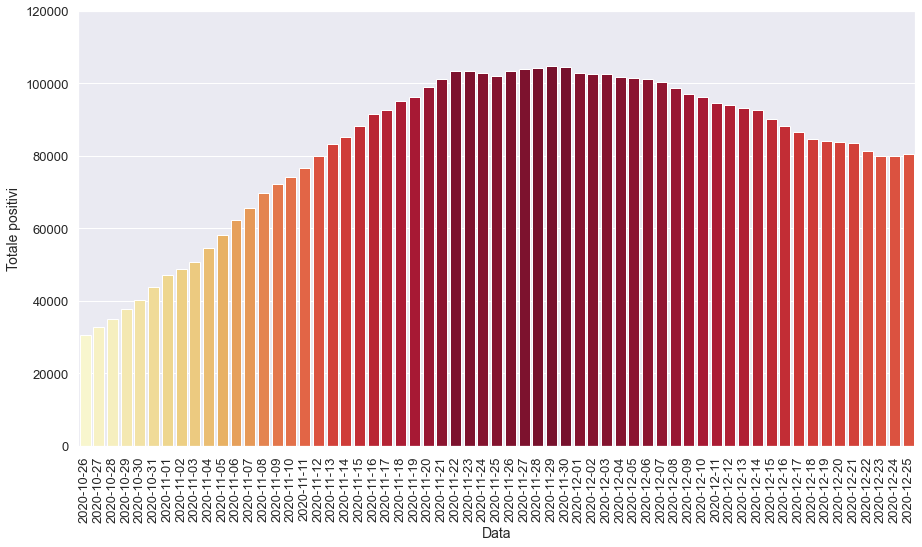

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

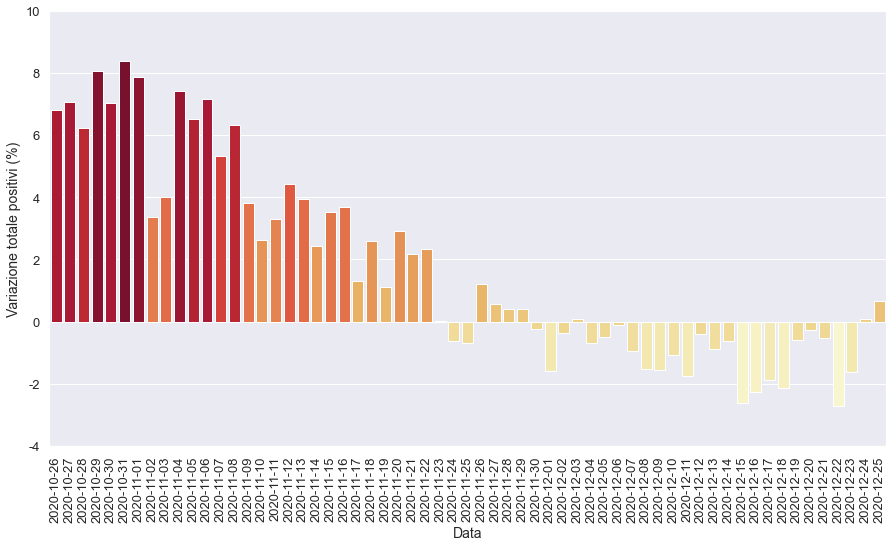

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

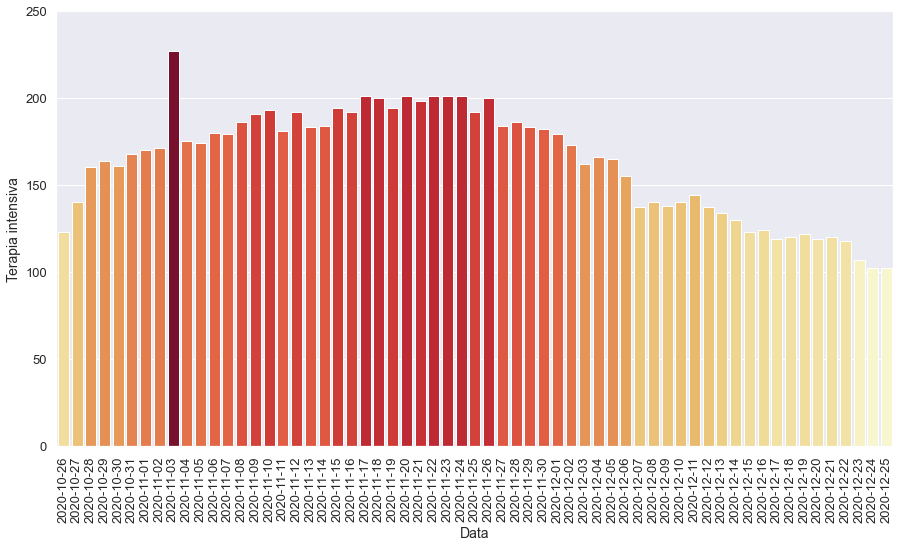

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

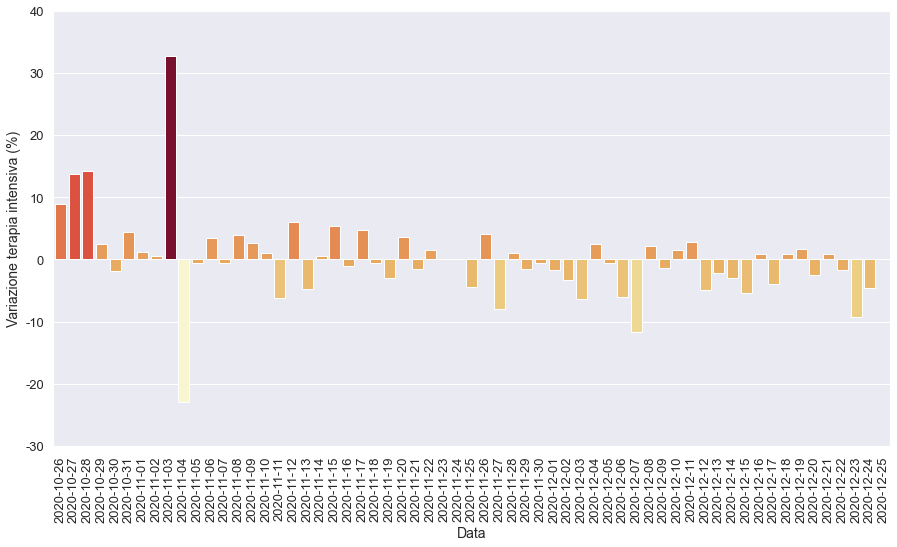

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

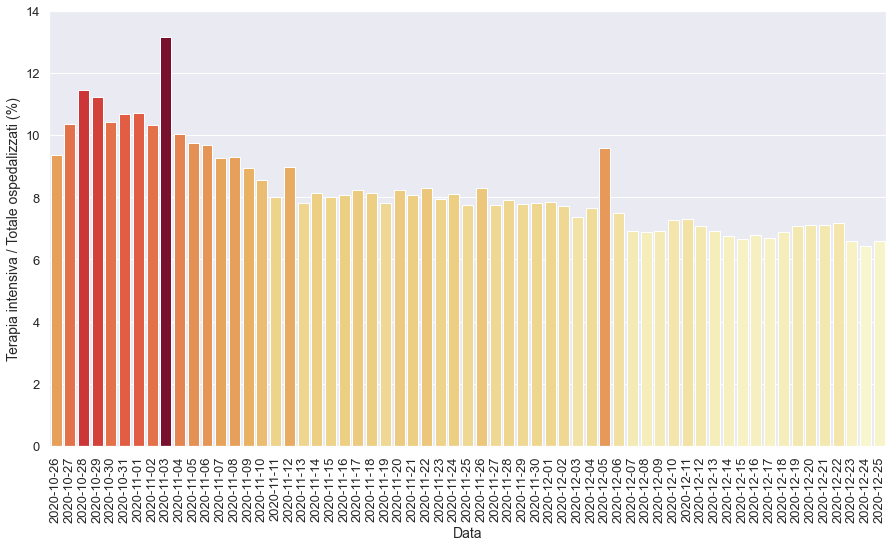

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

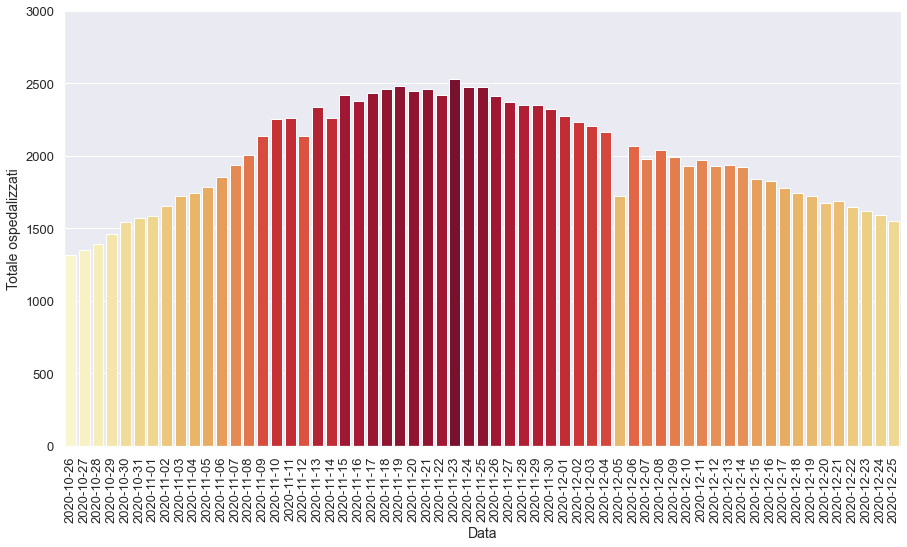

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

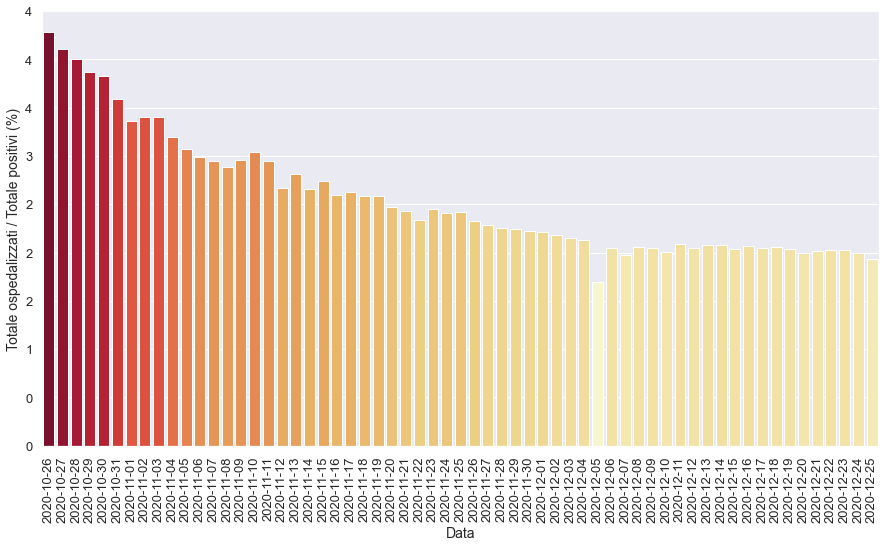

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

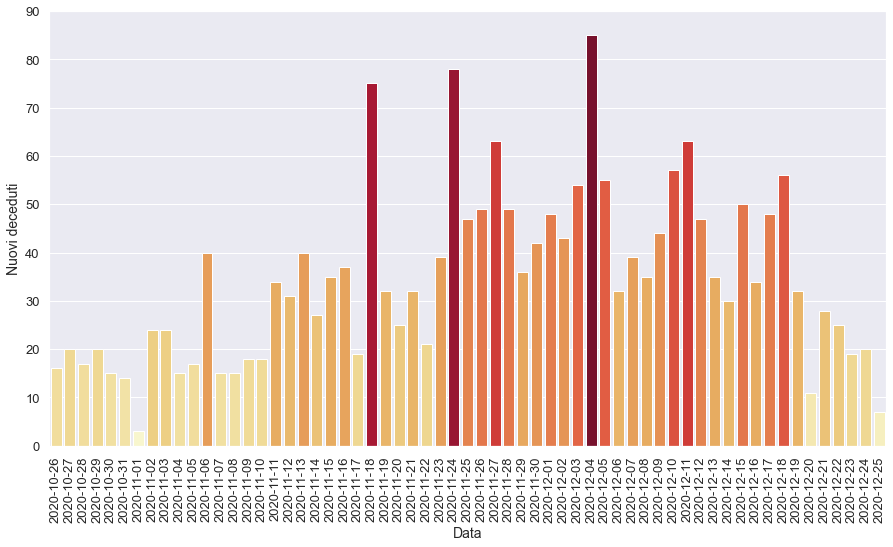

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

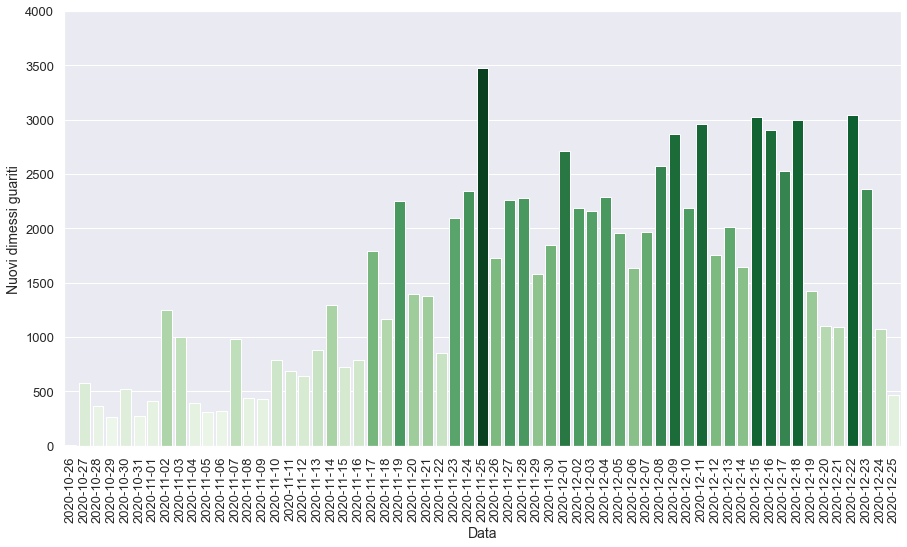

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-25T17:00:00,15,Campania,2282,192,2474,99674,102148,-703,2815,...,47.0,23130.0,16937.0,-702.0,7.76,2.42,12.17,16.62,-4.48,-0.68
1,2020-11-26T17:00:00,15,Campania,2212,200,2412,100972,103384,1236,3008,...,49.0,23761.0,11352.0,1298.0,8.29,2.33,12.66,26.50,4.17,1.21
2,2020-11-27T17:00:00,15,Campania,2188,184,2372,101610,103982,598,2924,...,63.0,22301.0,14597.0,638.0,7.76,2.28,13.11,20.03,-8.00,0.58
3,2020-11-28T17:00:00,15,Campania,2164,186,2350,102033,104383,401,2729,...,49.0,22007.0,14374.0,423.0,7.91,2.25,12.40,18.99,1.09,0.39
4,2020-11-29T17:00:00,15,Campania,2165,183,2348,102438,104786,403,2022,...,36.0,19063.0,7645.0,405.0,7.79,2.24,10.61,26.45,-1.61,0.39
5,2020-11-30T17:00:00,15,Campania,2141,182,2323,102204,104527,-259,1626,...,42.0,14286.0,7143.0,-234.0,7.83,2.22,11.38,22.76,-0.55,-0.25
6,2020-12-01T17:00:00,15,Campania,2099,179,2278,100601,102879,-1648,1113,...,48.0,9241.0,4219.0,-1603.0,7.86,2.21,12.04,26.38,-1.65,-1.58
7,2020-12-02T17:00:00,15,Campania,2064,173,2237,100258,102495,-384,1842,...,43.0,19759.0,12964.0,-343.0,7.73,2.18,9.32,14.21,-3.35,-0.37
8,2020-12-03T17:00:00,15,Campania,2041,162,2203,100371,102574,79,2295,...,54.0,24709.0,17876.0,113.0,7.35,2.15,9.29,12.84,-6.36,0.08
9,2020-12-04T17:00:00,15,Campania,1999,166,2165,99691,101856,-718,1651,...,85.0,18733.0,13631.0,-680.0,7.67,2.13,8.81,12.11,2.47,-0.70


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

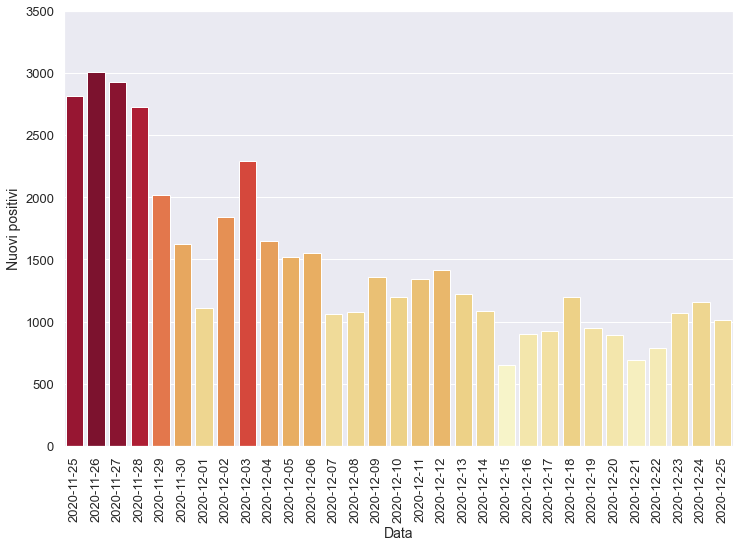

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

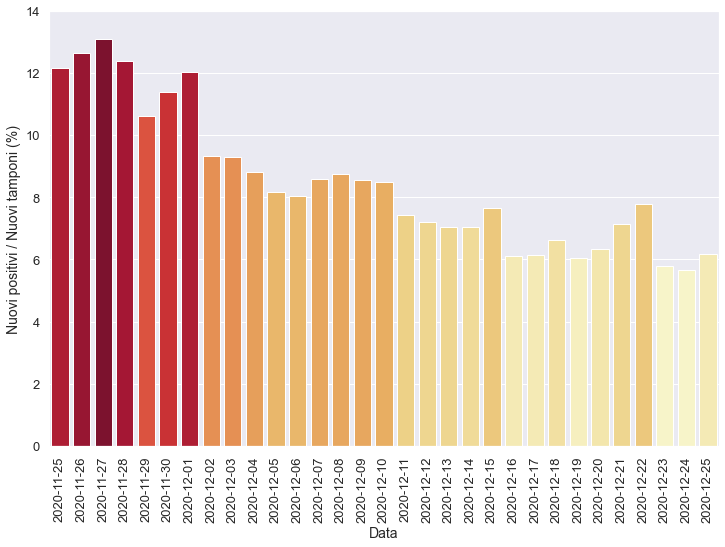

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

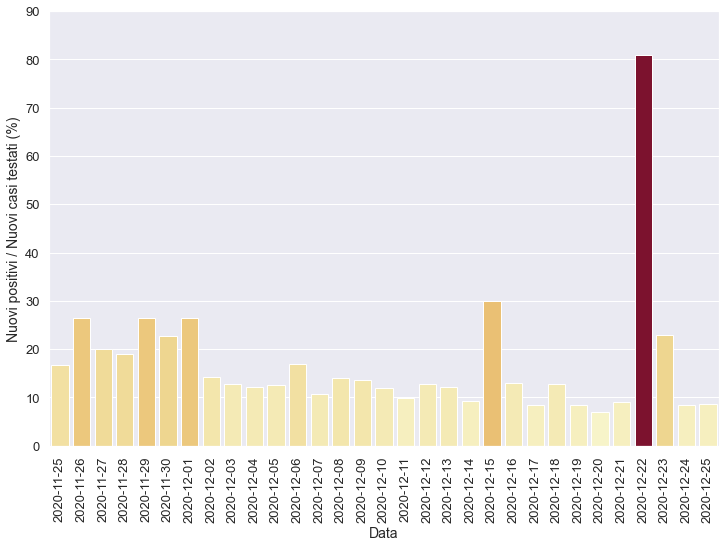

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

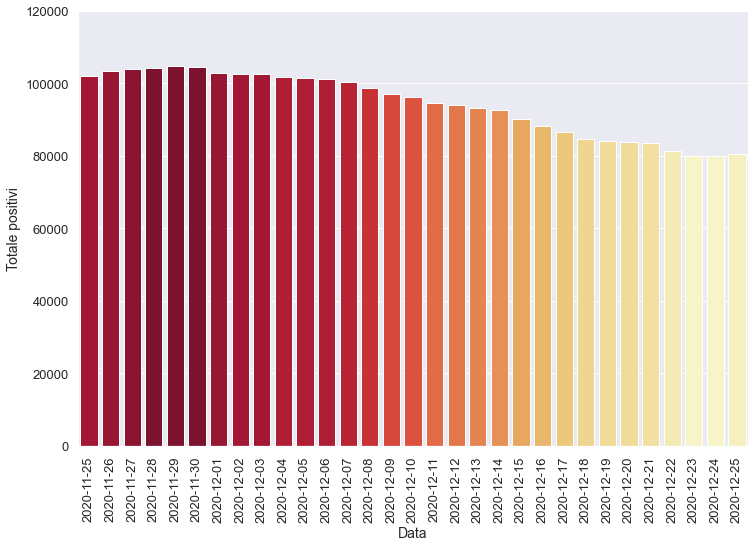

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

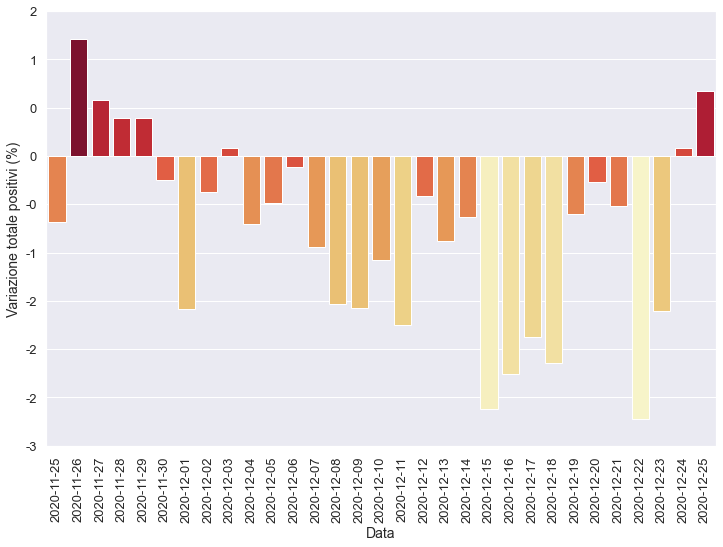

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

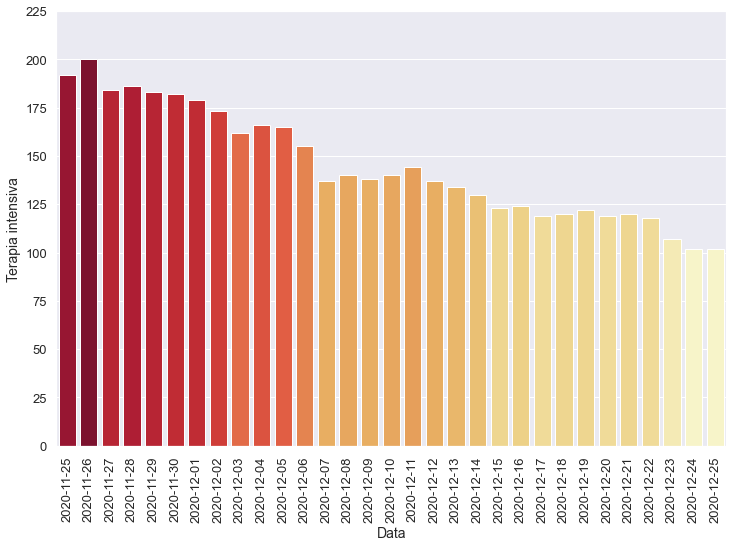

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

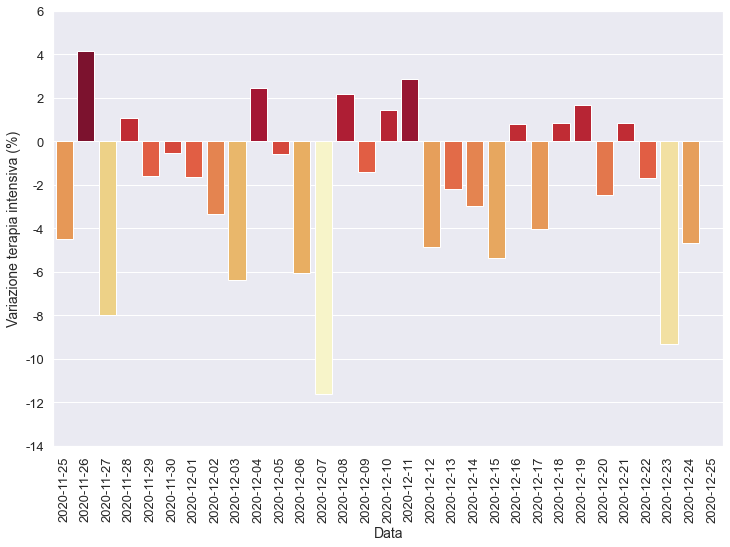

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

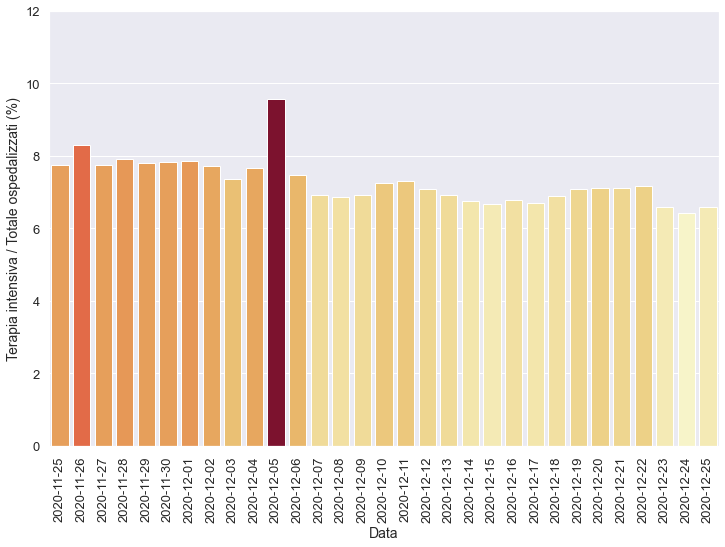

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

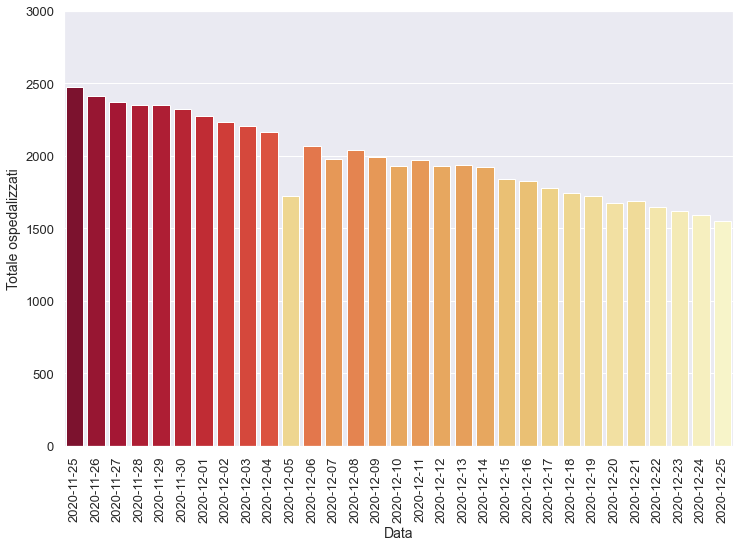

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

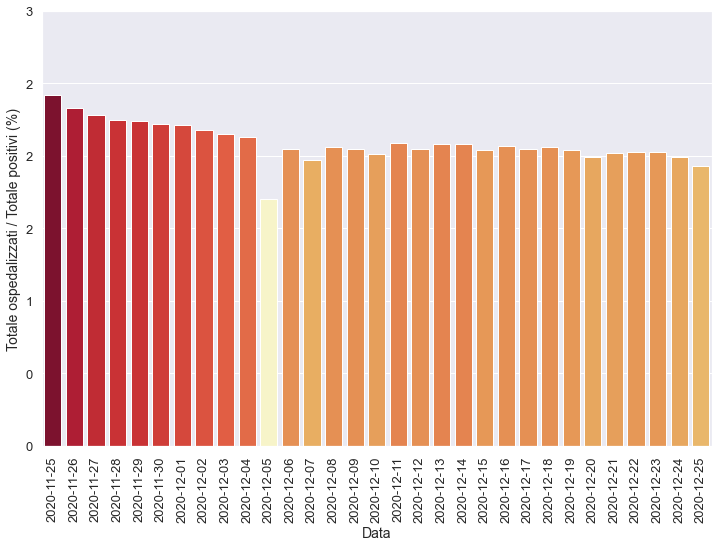

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

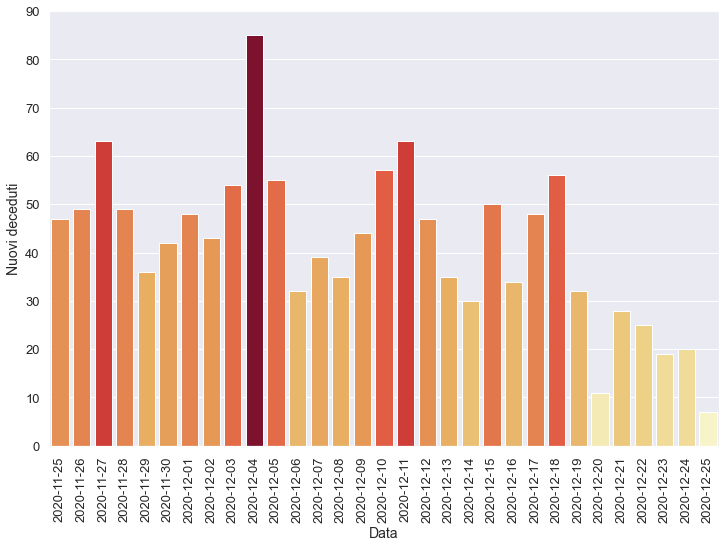

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

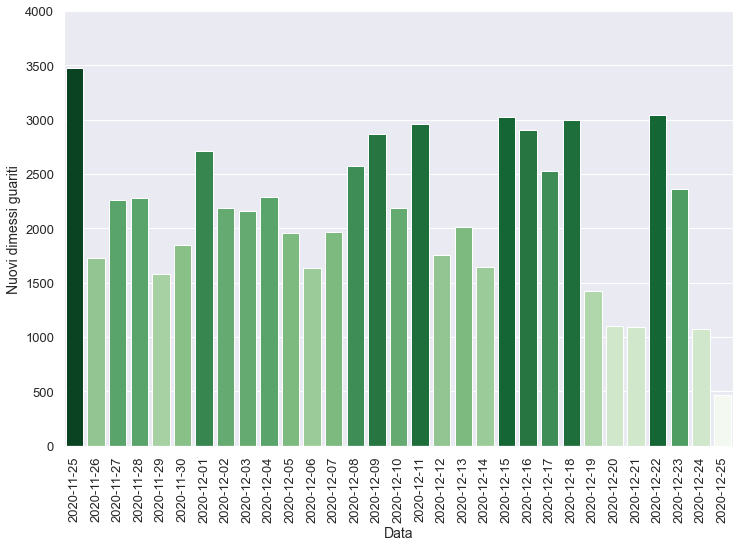

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-18T17:00:00,15,Campania,1621,120,1741,82956,84697,-1856,1201,...,56.0,18146.0,9403.0,-1822.0,6.89,2.06,6.62,12.77,0.84,-2.14
1,2020-12-19T17:00:00,15,Campania,1598,122,1720,82470,84190,-507,949,...,32.0,15739.0,11372.0,-486.0,7.09,2.04,6.03,8.35,1.67,-0.60
2,2020-12-20T17:00:00,15,Campania,1554,119,1673,82293,83966,-224,891,...,11.0,14109.0,12681.0,-177.0,7.11,1.99,6.32,7.03,-2.46,-0.27
3,2020-12-21T17:00:00,15,Campania,1571,120,1691,81841,83532,-434,691,...,28.0,9662.0,7692.0,-452.0,7.10,2.02,7.15,8.98,0.84,-0.52
4,2020-12-22T17:00:00,15,Campania,1529,118,1647,79612,81259,-2273,791,...,25.0,10185.0,979.0,-2229.0,7.16,2.03,7.77,80.80,-1.67,-2.72
5,2020-12-23T17:00:00,15,Campania,1513,107,1620,78327,79947,-1312,1067,...,19.0,18426.0,4672.0,-1285.0,6.60,2.03,5.79,22.84,-9.32,-1.61
6,2020-12-24T17:00:00,15,Campania,1488,102,1590,78419,80009,62,1156,...,20.0,20404.0,13612.0,92.0,6.42,1.99,5.67,8.49,-4.67,0.08
7,2020-12-25T17:00:00,15,Campania,1449,102,1551,78996,80547,538,1009,...,7.0,16355.0,11689.0,577.0,6.58,1.93,6.17,8.63,0.00,0.67


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

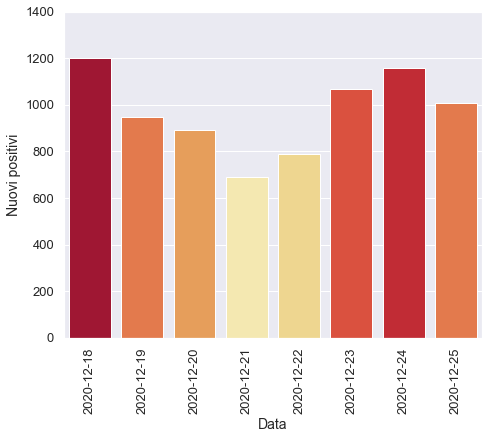

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

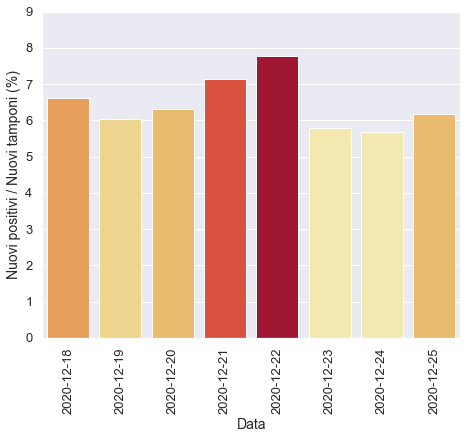

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

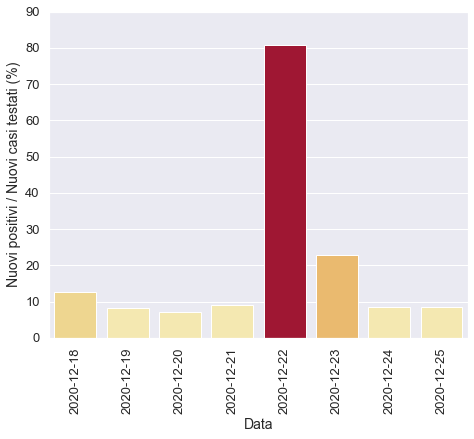

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

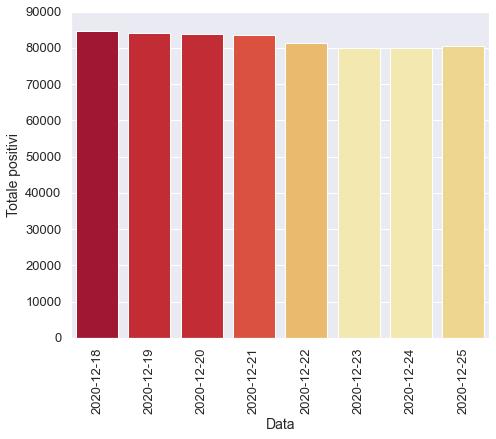

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

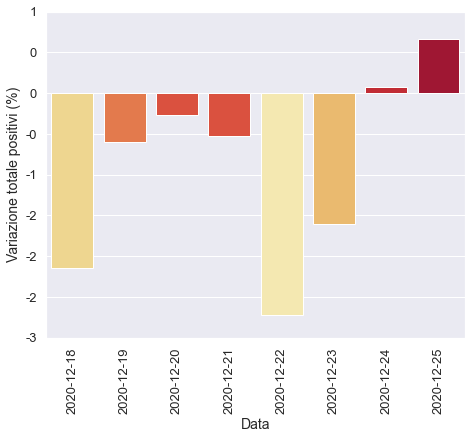

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

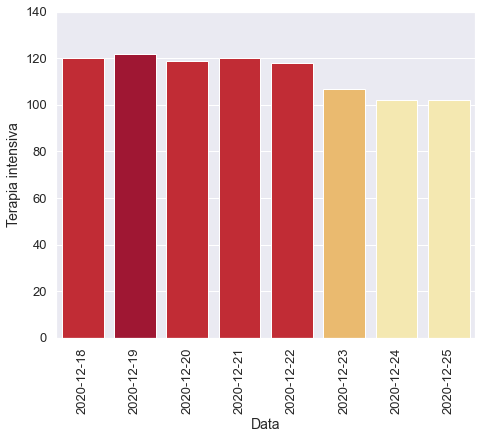

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

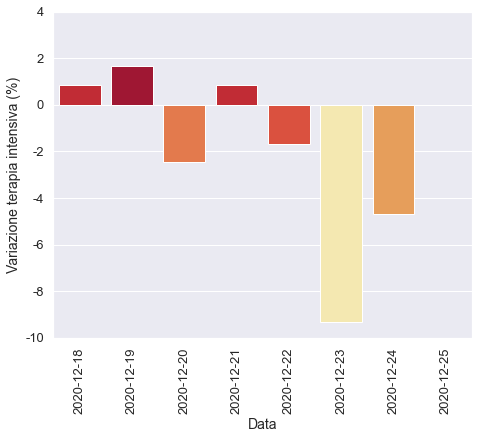

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

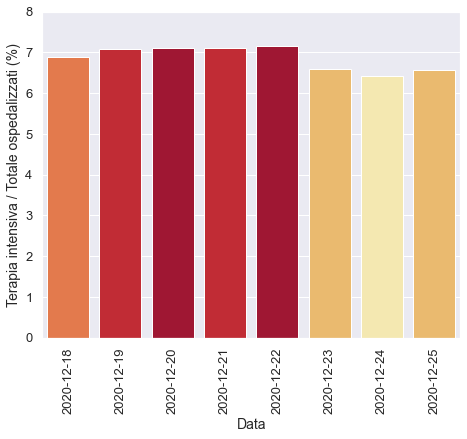

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

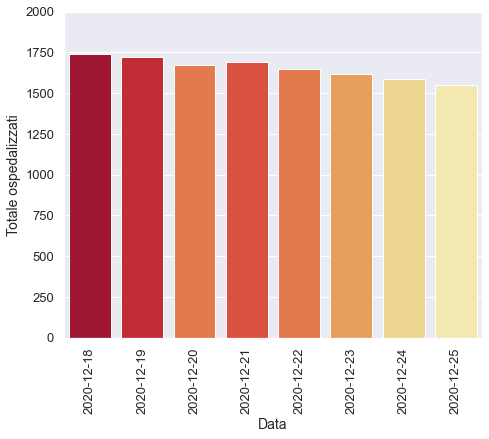

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

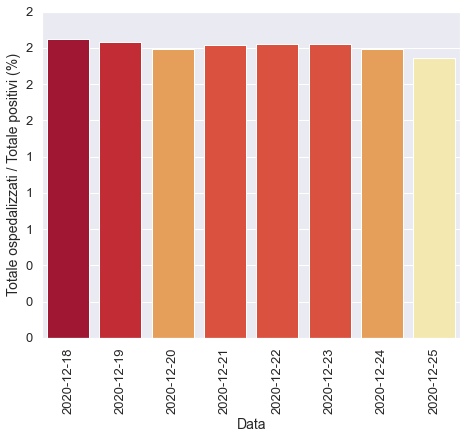

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

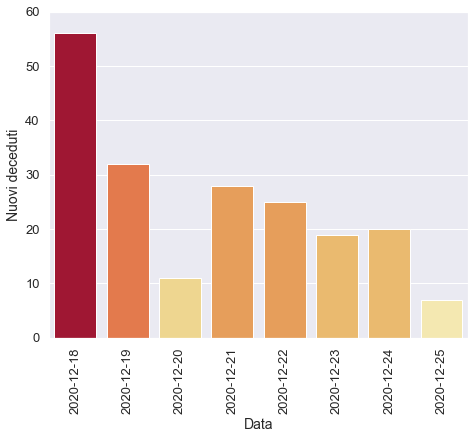

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

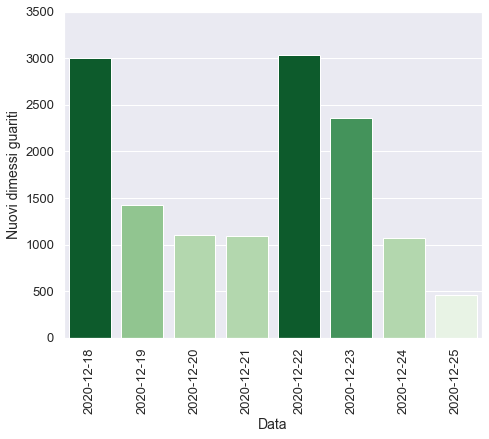

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)